In this notebook, we will use the popular machine learning package for neural network and deep learning, [Keras](https://keras.io) on top of the [tensorflow](https://www.tensorflow.org).   

We will work on the famous [Handwritten Digits Data Sets](http://scikit-learn.org/stable/datasets/#optical-recognition-of-handwritten-digits-data-set), and classify the digits using MLP. Recognizing handwritten digits is vastly used everywhere these days, for example, when you deposit a check at ATM, an algorithm similar to what we will cover here to recognize the number you wrote. 

We will show the basic working flow of using the MLP classifier in Keras, and hope you can use this as an initial start in your research. Let's start now!

Note the example used here is modified by Qingkai Kong from [Keras Example](https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py)

In [1]:
# import all the needed module
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


## Load and visualize data 

Let's load the [Handwritten Digits Data Set](http://yann.lecun.com/exdb/mnist/) from Keras. The data set contains images of handwritten digits: 10 classes where each class refers to a digit from 0 to 9. The data includes a training set of 60,000 examples, and a test set of 10,000 examples which is a subset of a larger set available from NIST.  

In [2]:
# load data, and they are saving to the training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(f'The dataset contains {len(x_train)} training data examples, and {len(x_test)} test data examples')

The dataset contains 60000 training data examples, and 10000 test data examples


In [4]:
# let's look at how many classes we have
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

In [5]:
# let's look at one sample data
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
# also we print out the first 10 labels/classes of the data
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


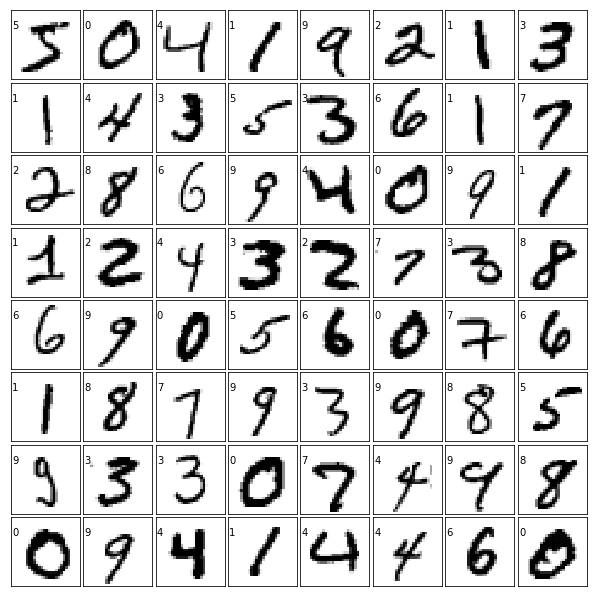

In [7]:
## plot the first 64 samples, and get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(y_train[i]))

## Prepare data for ANN

In [8]:
# Flatten the images into 1D array
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Convert the data type from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data by dividing the maximum value
x_train /= 255
x_test /= 255

In [9]:
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
# See what the labeling look like now by printing out the first label
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Build ANN classifier  

Let's start to build the ANN model. We start by initializing a sequential model and add two hidden layers. 

In [11]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
# We compile the model by telling it what algorithms we are using for the backprop. 
# what metrics to mesure and so on. 
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

## Train the model

Let's train the model using a batch size 128 and 20 epochs. 

In [13]:
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2430 - acc: 0.9261 - val_loss: 0.0970 - val_acc: 0.9681
Epoch 2/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.1022 - acc: 0.9687 - val_loss: 0.0874 - val_acc: 0.9741
Epoch 3/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0761 - acc: 0.9770 - val_loss: 0.0729 - val_acc: 0.9794
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0603 - acc: 0.9818 - val_loss: 0.0778 - val_acc: 0.9769
Epoch 5/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0507 - acc: 0.9846 - val_loss: 0.0697 - val_acc: 0.9815
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0431 - acc: 0.9875 - val_loss: 0.0688 - val_acc: 0.9827
Epoch 7/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0379 - acc: 0.9890 - val_loss: 0.0788 - 

I will explain the options usually you need change or know briefly here:  
* batch_size - How many data samples we pass to the model at once
* epochs - How many iterations we are doing for all the data, we are using 20 here, which means we run the training 20 times on all the training data. 

## Test ANN classifier and evaluate  

After we trained the ANN classifier, we will test the performance of the classifier using the test data.

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11516640678803032
Test accuracy: 0.9831


## Save the model for other use

In [14]:
model.save('my_model.h5')